Objective- Classify the patients as belonging to one of the 2 classes given the 3 features.

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv("haberman.csv")

In [7]:
np.shape(df)

(306, 4)

In [8]:
print (df.columns)

Index(['Age', 'Year of operations', 'Axillary Nodes', 'Survival Status'], dtype='object')


In [9]:
df["Survival Status"].value_counts()

Survive        225
Not Survive     81
Name: Survival Status, dtype: int64

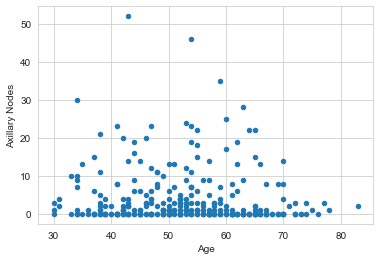

In [10]:
df.plot(kind="scatter",x="Age",y="Axillary Nodes");
plt.show()


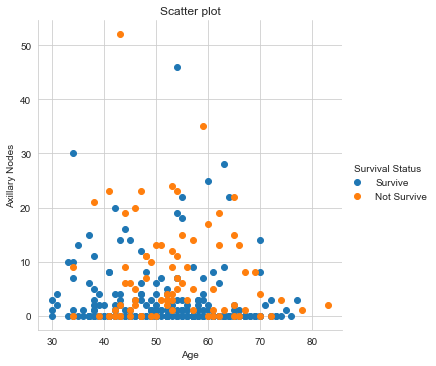

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Survival Status", size=5) \
   .map(plt.scatter, "Age", "Axillary Nodes") \
   .add_legend();
plt.title("Scatter plot")
plt.show();

Observation- it is seen that using Age and Axillary nodes we can seperate survival status but this plot is overlapping hence, we can not get the exact scenario.

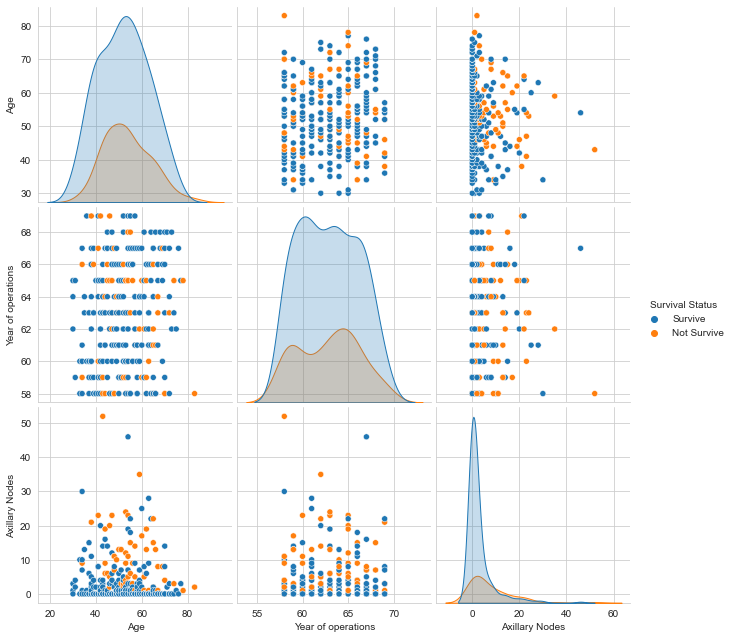

In [24]:
plt.title("Pair plot")
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Survival Status", size=3);

plt.show()

Observation-

Axillary nodes is useful feature to identify survive patients.

Age and Year of operation feature have some overlap.

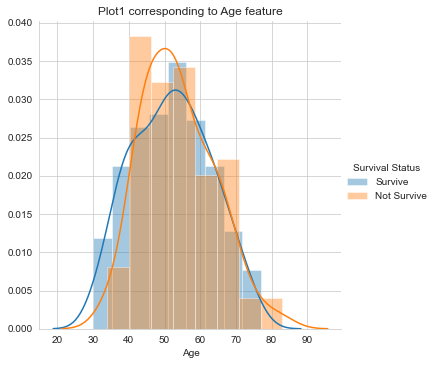

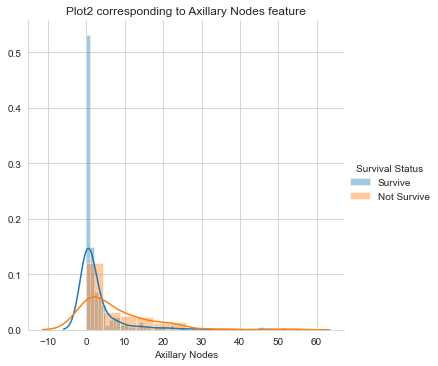

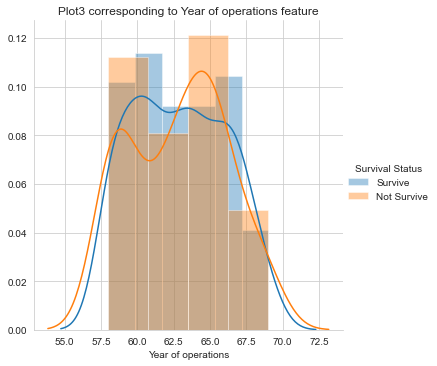

In [13]:
sns.FacetGrid(df, hue="Survival Status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title("Plot1 corresponding to Age feature")
plt.show();


sns.FacetGrid(df, hue="Survival Status", size=5) \
   .map(sns.distplot, "Axillary Nodes") \
   .add_legend();
plt.title("Plot2 corresponding to Axillary Nodes feature")
plt.show();


sns.FacetGrid(df, hue="Survival Status", size=5) \
   .map(sns.distplot, "Year of operations") \
   .add_legend();
plt.title("Plot3 corresponding to Year of operations feature")
plt.show();

Observations-
Age polt-
people wthin range 40-60 are more likely to die.

people less than age 40 are more likely to survive.

Year of operation-
patients whose operation was done in between 58 to 61 and 63 to 66 died.

Axillary node- It is partially overlapping among two classes.

patients having 0 axillary nodes will survive.

In [14]:
class_1=df.loc[df["Survival Status"]=="Survive"]
class_2=df.loc[df["Survival Status"]=="Not Survive"]

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


Text(0.5, 0, 'Age')

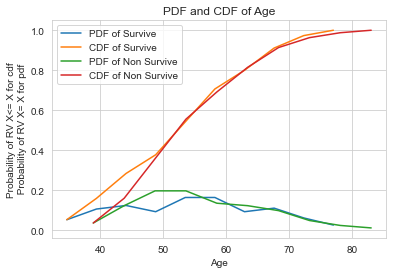

In [25]:
counts, bin_edges = np.histogram(class_1['Age'], bins=10, 
                                density = True)
sns.set_style("whitegrid");
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of Survive');

plt.plot(bin_edges[1:], cdf,label='CDF of Survive')


counts, bin_edges = np.histogram(class_2['Age'], bins=10, 
                                 density = True)
sns.set_style("whitegrid");
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of Non Survive');
plt.plot(bin_edges[1:], cdf,label='CDF of Non Survive')
plt.legend()
plt.title("PDF and CDF of Age")
plt.ylabel("Probability of RV X<= X for cdf\n Probability of RV X= X for pdf")
plt.xlabel("Age")







Observations-
People between age range 50-60 are not survive.

41% of non survive papients are having age less than or equal to 50.

people between age range 40 are more survive

15% of survive patients are having age less than or equal to 40.



[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0.5, 0, 'Axillary Nodes')

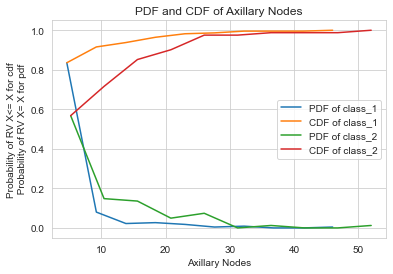

In [27]:
counts, bin_edges = np.histogram(class_1['Axillary Nodes'], bins=10, 
                                 density = True)
sns.set_style("whitegrid");
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of class_1');
plt.plot(bin_edges[1:], cdf,label='CDF of class_1')



counts, bin_edges = np.histogram(class_2['Axillary Nodes'], bins=10, 
                                 density = True)
sns.set_style("whitegrid");
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of class_2');
plt.plot(bin_edges[1:], cdf,label='CDF of class_2')
plt.legend()
plt.title("PDF and CDF of Axillary Nodes")
plt.ylabel("Probability of RV X<= X for cdf\n Probability of RV X= X for pdf")
plt.xlabel("Axillary Nodes")

Observations-
The people having 0 axillary node are survive.

75% of survive patients having axillary nodes less than or equal to 10.

82% of non survive patients having axillary nodes less than or equal to 20.



[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


Text(0.5, 0, 'Year of operation')

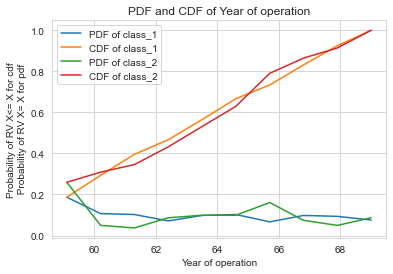

In [28]:
counts, bin_edges = np.histogram(class_1['Year of operations'], bins=10, 
                                 density = True)
sns.set_style("whitegrid");
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of class_1');
plt.plot(bin_edges[1:], cdf,label='CDF of class_1')

counts, bin_edges = np.histogram(class_2['Year of operations'], bins=10, 
                                 density = True)
sns.set_style("whitegrid");
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of class_2');
plt.plot(bin_edges[1:], cdf,label='CDF of class_2')
plt.legend()
plt.title("PDF and CDF of Year of operation")
plt.ylabel("Probability of RV X<= X for cdf\n Probability of RV X= X for pdf")
plt.xlabel("Year of operation")

Observations-
The people year of operation in between 63 to 66 are more die.

81% of non survive patients having year of operation less than of equal to 66.

The people year of operation year in between 60 to 62 are survive.

60% of survive patients having year of operation less than of equal to 64.


[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


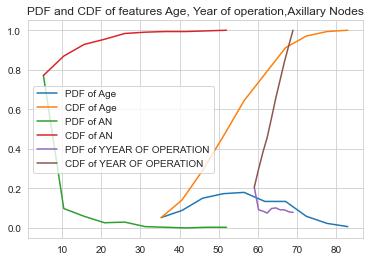

In [18]:
sns.set_style("whitegrid");
counts, bin_edges = np.histogram(df['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of Age')
plt.plot(bin_edges[1:], cdf,label='CDF of Age')


# virginica
counts, bin_edges = np.histogram(df['Axillary Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of AN')
plt.plot(bin_edges[1:], cdf,label='CDF of AN')



#versicolor
counts, bin_edges = np.histogram(df['Year of operations'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of YYEAR OF OPERATION')
plt.plot(bin_edges[1:], cdf,label='CDF of YEAR OF OPERATION')

plt.title("PDF and CDF of features Age, Year of operation,Axillary Nodes")         
plt.legend()
plt.show();


In [19]:
print("Means:")
print(np.mean(df["Age"]))
print(np.mean(df["Year of operations"]))
print(np.mean(df["Axillary Nodes"]))


print("\nStd-dev:");
print(np.std(df["Age"]))
print(np.std(df["Year of operations"]))
print(np.std(df["Axillary Nodes"]))


Means:
52.45751633986928
62.85294117647059
4.026143790849673

Std-dev:
10.78578520363183
3.244090833563246
7.177896092811152


In [20]:
print("\nMeans:")
print(np.mean(df["Age"]))
print(np.mean(np.append(df["Age"],50)))

print("\nQuantiles:")
print(np.percentile(df["Age"],np.arange(0, 100, 25)))
print(np.percentile(df["Year of operations"],np.arange(0, 100, 25)))
print(np.percentile(df["Axillary Nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(df["Age"],90))
print(np.percentile(df["Year of operations"],90))
print(np.percentile(df["Axillary Nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df["Age"]))
print(robust.mad(df["Year of operations"]))
print(robust.mad(df["Axillary Nodes"]))


Means:
52.45751633986928
52.44951140065147

Quantiles:
[30.   44.   52.   60.75]
[58.   60.   63.   65.75]
[0. 0. 1. 4.]

90th Percentiles:
67.0
67.0
13.0

Median Absolute Deviation
11.860817748044816
4.447806655516806
1.482602218505602


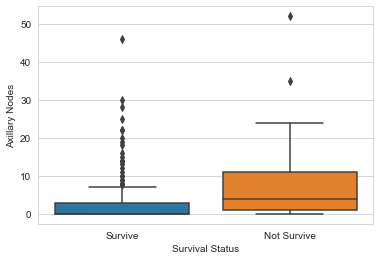

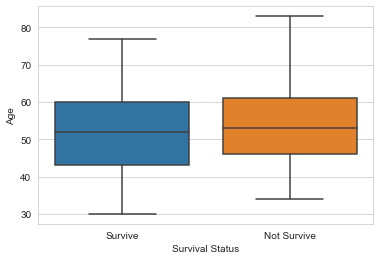

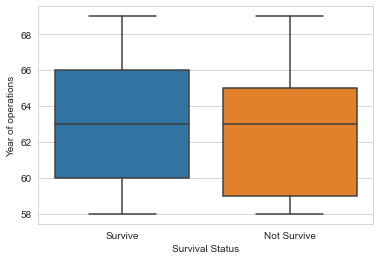

In [21]:
sns.set_style("whitegrid");
sns.boxplot(x = 'Survival Status', y ='Axillary Nodes', data = df)
plt.show()

sns.boxplot(x = 'Survival Status',y = 'Age', data = df)
plt.show()

sns.boxplot(x = 'Survival Status', y = 'Year of operations', data = df)
plt.show()

Observation-
Age-It is clearly seen that most 95% of data points are overlapping with almost the same median.

Year of operation- It is clearly seen that 80% of data point are overlapping with almost same madian.

Axillary Nodes- Box plot of class 1(Survive) have outliers and also visible that around 50% of patients have axillary nodes 

less than or equal to 3.


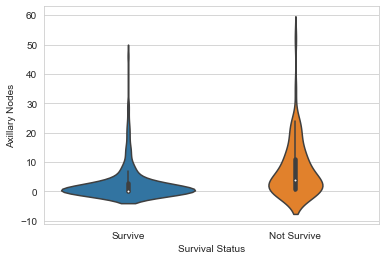

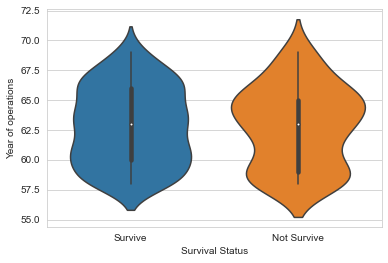

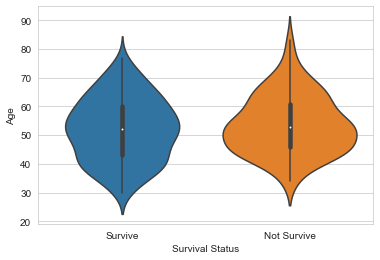

In [22]:
sns.set_style("whitegrid");
sns.violinplot(x = "Survival Status", y = "Axillary Nodes", data = df, size = 5)
plt.show()



sns.violinplot(x = "Survival Status", y = "Year of operations", data = df, size = 5)
plt.show()


sns.violinplot(x = "Survival Status", y = "Age", data = df, size = 5)
plt.show()

Observations-

Age plot and Year of operation plot is almost overlapping .

Axillary Nodes-
The survived patients have axil node equal to 0 and not survives patients have axil nodes greater than or equal to 1.
The axil nodes increases the respective patients is more likely to die.

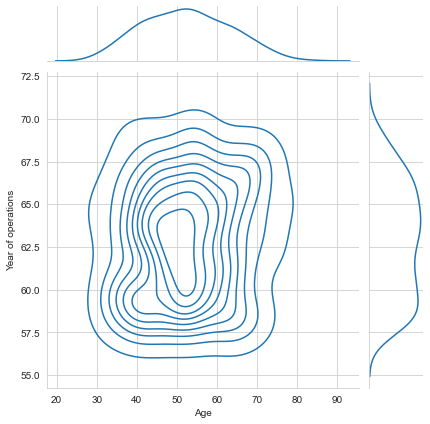

In [32]:
sns.jointplot(x="Age",y="Year of operations", data=df,kind="kde",palette="husl");
plt.show()


Conclusion-

1)Survive patients is more as compare to non survive patients.

2)Probability of survive patients is more using axil nodes lie in range (0,3).

3)Patients who have 0 axillary nodes have 82% of chances to survive.

4)Axil nodes is little bit more useful features than Age and Year of operations.


